<a href="https://colab.research.google.com/github/usmaaangul/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone Github

In [ ]:
# !git clone https://github.com/clguo/RSAN.git

In [ ]:
!git clone https://github.com/usmaaangul/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo.git

fatal: destination path 'Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo' already exists and is not an empty directory.


# Importing Using Libraries

















In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# Matrix
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from keras.metrics import Recall, Precision


from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard


#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

from keras.models import Model


from keras.callbacks import ReduceLROnPlateau

# specifically for cnn


from keras.layers import BatchNormalization, MaxPool2D, Conv2DTranspose, Concatenate, Input

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D ,GlobalAveragePooling2D
 
import tensorflow as tf
import random as rn
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils.np_utils import to_categorical

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2    
import imageio              
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from keras import backend as K
import gc

# Loading Images and Masks

In [ ]:
IMG_SIZE=512
epoch_size=50
batch_size=2
X1=list()
Z1=list()

def make_train_data(DIR_img,DIR_msk):

  #_______Load Images_________#

  for img in tqdm(sorted(os.listdir(DIR_img))):
    path = os.path.join(DIR_img,img) # Join the name and path together
    
    img = cv2.imread(path,cv2.IMREAD_COLOR) # RGB Image
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) # Shape (512 x 512 x 3)
    #plt.imshow(img)
    X1.append(np.array(img))

  #_______Load Masks_________#

  for msk in tqdm(sorted(os.listdir(DIR_msk))):
    path = os.path.join(DIR_msk,msk)

    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE) # Gray Scale mask
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) # Shape (512 x 512)
    #plt.imshow(img)
    Z1.append(np.array(img))


In [ ]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/train/image'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/train/label'

make_train_data(image_dir,mask_dir)

100%|██████████| 18/18 [00:00<00:00, 360.98it/s]


In [ ]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/validate/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/validate/labels'

make_train_data(image_dir,mask_dir)

100%|██████████| 2/2 [00:00<00:00, 333.04it/s]


In [ ]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/test/image'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/test/label'

make_train_data(image_dir,mask_dir)

100%|██████████| 8/8 [00:00<00:00, 359.74it/s]


In [ ]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/test/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/test/label'

make_train_data(image_dir,mask_dir)

100%|██████████| 20/20 [00:00<00:00, 528.45it/s]


In [ ]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/train/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/train/labels'

make_train_data(image_dir,mask_dir)

100%|██████████| 18/18 [00:00<00:00, 542.03it/s]


In [ ]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/validate/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/validate/labels'

make_train_data(image_dir,mask_dir)

100%|██████████| 2/2 [00:00<00:00, 432.36it/s]


# Data Augmentation

In [ ]:
len(Z1)

68

In [ ]:
len(X1)

68

In [ ]:
from albumentations import HorizontalFlip, VerticalFlip, ElasticTransform, GridDistortion, OpticalDistortion

def augment_data(images, masks):
  X=list()
  Y=list()
  temp=0
  for x, y in zip(images, masks):
    

    if temp==0:
      plt.subplot(121)
      plt.imshow(x)
      plt.title("Orignal Image")

      plt.subplot(122)
      plt.imshow(y)
      plt.title("Orignal Mask")
      plt.show()



    #_____________________________#
    aug = HorizontalFlip(p=1.0)
    augmented = aug(image=x, mask=y)
    x1 = augmented["image"]
    y1 = augmented["mask"]

    #x1 = cv2.resize(x1, (IMG_SIZE,IMG_SIZE))
    
    X.append(x1)

    #y1 = cv2.resize(y1, (IMG_SIZE,IMG_SIZE))
    #y1=np.array(y1)
    #y1=np.expand_dims(y1, axis=-1)
    Y.append(y1)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x1)
      plt.title("HorizontalFlif Image")
      

      plt.subplot(122)
      plt.imshow(y1)
      plt.title("HorizontalFlif Mask")
      plt.show()



    #_____________________________#
    aug = VerticalFlip(p=1.0)
    augmented = aug(image=x, mask=y)
    x2 = augmented["image"]
    y2 = augmented["mask"]

    #x2 = cv2.resize(x2, (IMG_SIZE,IMG_SIZE))
    X.append(x2)

    #y2 = cv2.resize(y2, (IMG_SIZE,IMG_SIZE))
    #y2=np.array(y2)
    #y2=np.expand_dims(y2, axis=-1)
    Y.append(y2)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x2)
      plt.title("VerticalFlip Image")
      
      plt.subplot(122)
      plt.imshow(y2)
      plt.title("VerticalFlip Mask")
      plt.show()



    #_____________________________#
    aug = ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
    augmented = aug(image=x, mask=y)
    x3 = augmented['image']
    y3 = augmented['mask']

    #x3 = cv2.resize(x3, (IMG_SIZE,IMG_SIZE))
    X.append(x3)

    #y3 = cv2.resize(y3, (IMG_SIZE,IMG_SIZE))
    #y3=np.array(y3)
    #y3=np.expand_dims(y3, axis=-1)
    Y.append(y3)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x3)
      plt.title("ElasticTransform Image")
      
      plt.subplot(122)
      plt.imshow(y3)
      plt.title("ElasticTransform Mask")
      plt.show()


    #_____________________________#
    aug = GridDistortion(p=1)
    augmented = aug(image=x, mask=y)
    x4 = augmented['image']
    y4 = augmented['mask']

    #x4 = cv2.resize(x4, (IMG_SIZE,IMG_SIZE))
    X.append(x4)

    #y4 = cv2.resize(y4, (IMG_SIZE,IMG_SIZE))
    #y4=np.array(y4)
    #y4=np.expand_dims(y4, axis=-1)
    Y.append(y4)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x4)
      plt.title("GridDistortion Image")
      
      plt.subplot(122)
      plt.imshow(y4)
      plt.title("GridDistortion Mask")
      plt.show()


    #_____________________________#
    aug = OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
    augmented = aug(image=x, mask=y)
    x5 = augmented['image']
    y5 = augmented['mask']

    #x5 = cv2.resize(x5, (IMG_SIZE,IMG_SIZE))
    X.append(x5)

    #y5 = cv2.resize(y5, (IMG_SIZE,IMG_SIZE))
    #y5=np.array(y5)
    #y5=np.expand_dims(y5, axis=-1)
    Y.append(y5)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x5)
      plt.title("OpticalDistortion Image")


      plt.subplot(122)
      plt.imshow(y5)
      plt.title("OpticalDistortion Mask")
      plt.show()




    #_____________________________#
    #x = cv2.resize(x, (IMG_SIZE,IMG_SIZE))
    X.append(x)

    #y = cv2.resize(y, (IMG_SIZE,IMG_SIZE))
    #y=np.array(y)
    #y=np.expand_dims(y, axis=-1)
    Y.append(y)
    
    temp=1

            

  return X,Y

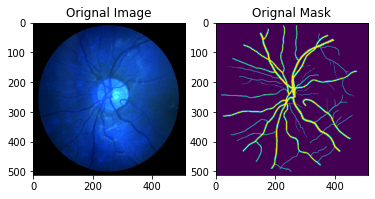

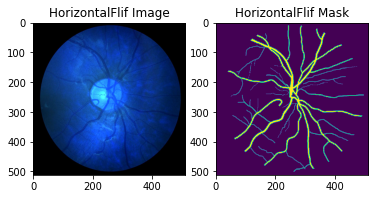

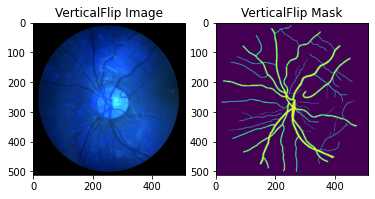

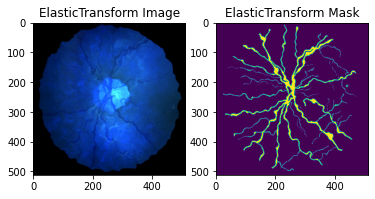

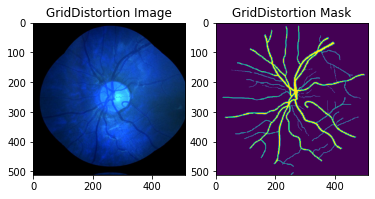

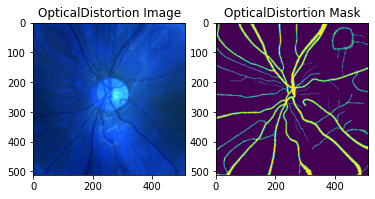

In [ ]:
X,Y=augment_data(X1,Z1)

# Normalize the data

In [ ]:
X=np.array(X)
X=X/255

Y=np.array(Y)
Y=Y/255

# Display some images and it's masks

In [ ]:
X.shape

(408, 512, 512, 3)

In [ ]:
Y.shape

(408, 512, 512)

In [ ]:
#check=Y
#check=np.expand_dims(check, axis=-1)
#check = np.concatenate([check, check, check], axis=-1)
#check.shape

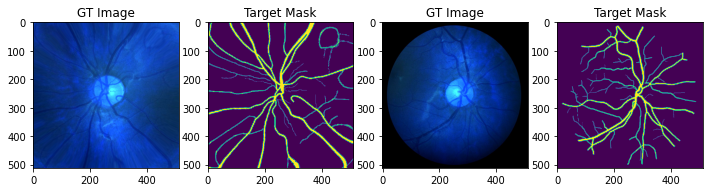

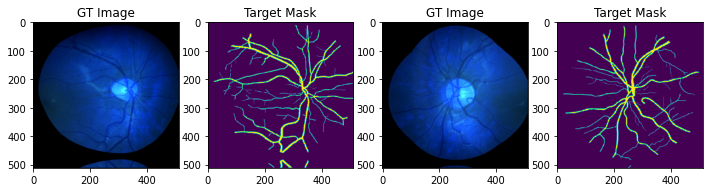

In [ ]:
## displaying data loaded by our function
for i in range(2):
  num=np.random.randint(10)
  plt.figure(figsize=(12,6))
  plt.subplot(1,4,1)
  plt.imshow(X[num])
  plt.title("GT Image")
  plt.subplot(1,4,2)
  plt.imshow(Y[num])
  plt.title("Target Mask")

  num=np.random.randint(10)
  plt.subplot(1,4,3)
  plt.imshow(X[num+1])
  plt.title("GT Image")
  plt.subplot(1,4,4)
  plt.imshow(Y[num+1])
  plt.title("Target Mask")
  plt.show()

# Split data into training and testing and Validation set

In [ ]:
#print(Y.shape)
#Y=np.expand_dims(Y, axis=-1)
#print(Y.shape)
#Y = np.concatenate([Y, Y, Y], axis=-1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size=0.5)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

### Model uning Functionl API's from keras

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x


def build_unet(input_shape): 
    inputs = Input(input_shape)

    #Encoding
    s1 = conv_block(inputs, 64)
    p1 = MaxPool2D((2, 2))(s1)
    
    s2 = conv_block(p1, 128)
    p2 = MaxPool2D((2, 2))(s2)

    s3 = conv_block(p2, 256)
    p3 = MaxPool2D((2, 2))(s3)

    s4 = conv_block(p3, 512)
    p4 = MaxPool2D((2, 2))(s4)

    b5 = conv_block(p4, 1024)

    # Decoding
    
    d6 = Conv2DTranspose(512, (2, 2), strides=2, padding="same")(b5)
    d6 = Concatenate()([d6, s4])
    d6 = conv_block(d6, 512)

    d7 = Conv2DTranspose(256, (2, 2), strides=2, padding="same")(d6)
    d7 = Concatenate()([d7, s3])
    d7 = conv_block(d7, 256)

    d8 = Conv2DTranspose(128, (2, 2), strides=2, padding="same")(d7)
    d8 = Concatenate()([d8, s2])
    d8 = conv_block(d8, 128)

    d9 = Conv2DTranspose(64, (2, 2), strides=2, padding="same")(d8)
    d9 = Concatenate()([d9, s1])
    d9 = conv_block(d9, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d9)

    model = Model(inputs, outputs, name="UNET")
    return model

In [ ]:
model = build_unet((IMG_SIZE, IMG_SIZE,3))
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

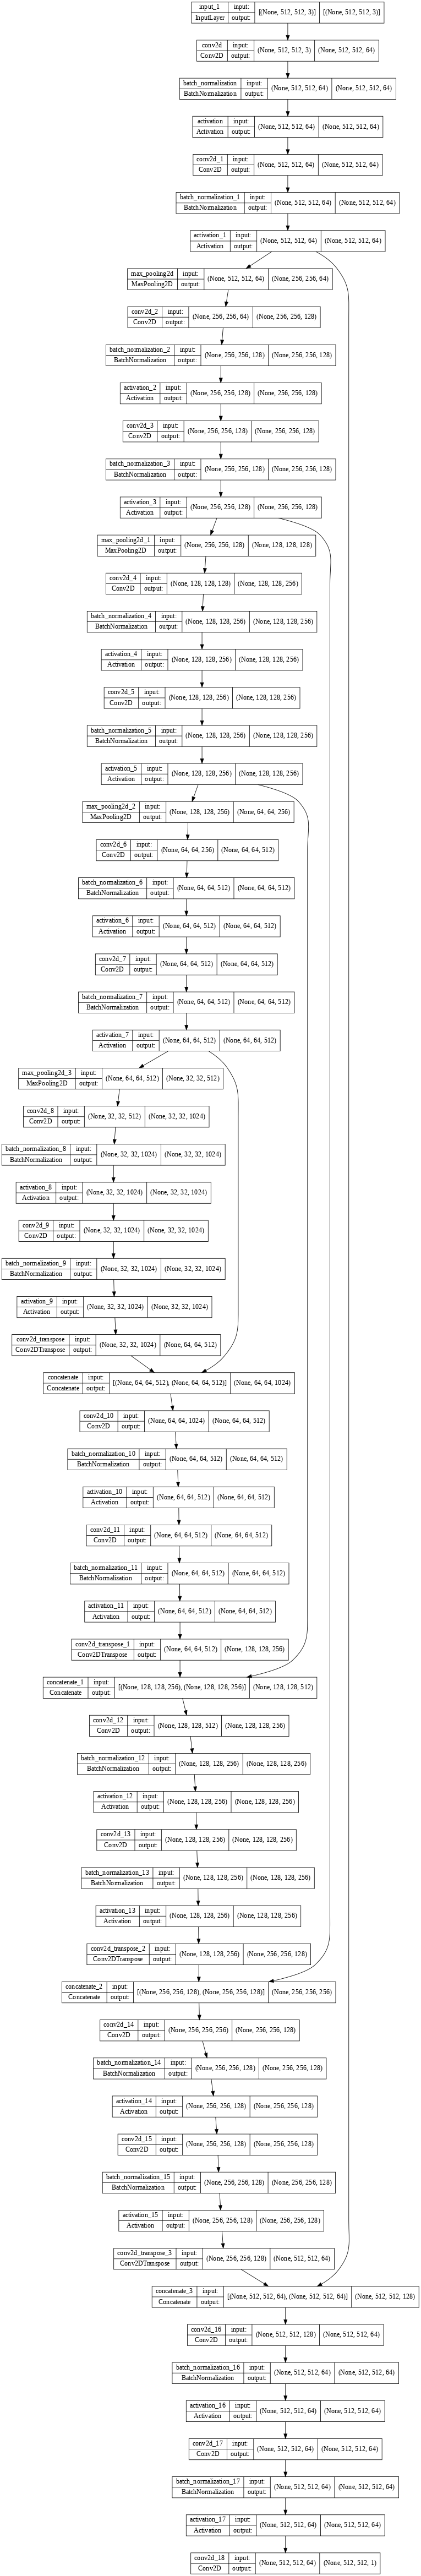

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=True,dpi=60)

In [ ]:
History1 = model.fit(x_train,y_train,
                     batch_size=batch_size,epochs = epoch_size, 
                     validation_data = (x_test,y_test),verbose = 1)


history_df = pd.DataFrame(History1.history)

Epoch 1/50
163/163 [==============================] - 49s 271ms/step - loss: 0.1884 - accuracy: 0.9081 - val_loss: 0.3411 - val_accuracy: 0.8875
Epoch 2/50
163/163 [==============================] - 44s 267ms/step - loss: 0.1218 - accuracy: 0.9248 - val_loss: 0.3212 - val_accuracy: 0.8767
Epoch 3/50
163/163 [==============================] - 44s 267ms/step - loss: 0.1112 - accuracy: 0.9270 - val_loss: 0.1944 - val_accuracy: 0.9016
Epoch 4/50
163/163 [==============================] - 44s 267ms/step - loss: 0.1034 - accuracy: 0.9294 - val_loss: 0.1282 - val_accuracy: 0.9267
Epoch 5/50
163/163 [==============================] - 44s 267ms/step - loss: 0.1012 - accuracy: 0.9299 - val_loss: 0.1139 - val_accuracy: 0.9290
Epoch 6/50
163/163 [==============================] - 44s 267ms/step - loss: 0.0973 - accuracy: 0.9308 - val_loss: 0.1011 - val_accuracy: 0.9314
Epoch 7/50
163/163 [==============================] - 44s 267ms/step - loss: 0.0945 - accuracy: 0.9316 - val_loss: 0.1018 - val_ac

In [ ]:
x_train[0].shape

(512, 512, 3)

In [ ]:
x_test[0].shape

(512, 512, 3)

In [ ]:
y_train[0].shape

(512, 512)

## More Process

In [ ]:
#model.save('model.h5')

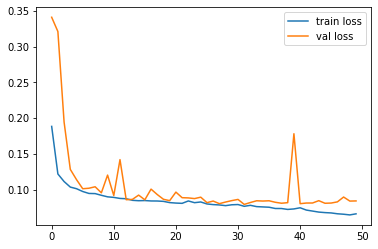

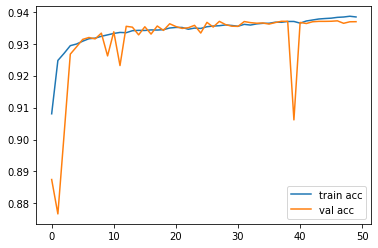

In [ ]:
# plot the loss
plt.plot(History1.history['loss'], label='train loss')
plt.plot(History1.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(History1.history['accuracy'], label='train acc')
plt.plot(History1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

### Save Model to drive and load again

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/MyDrive/usman gul/model.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/usman gul/model.h5')

In [ ]:
Pred = model.predict(x_test, batch_size=16)

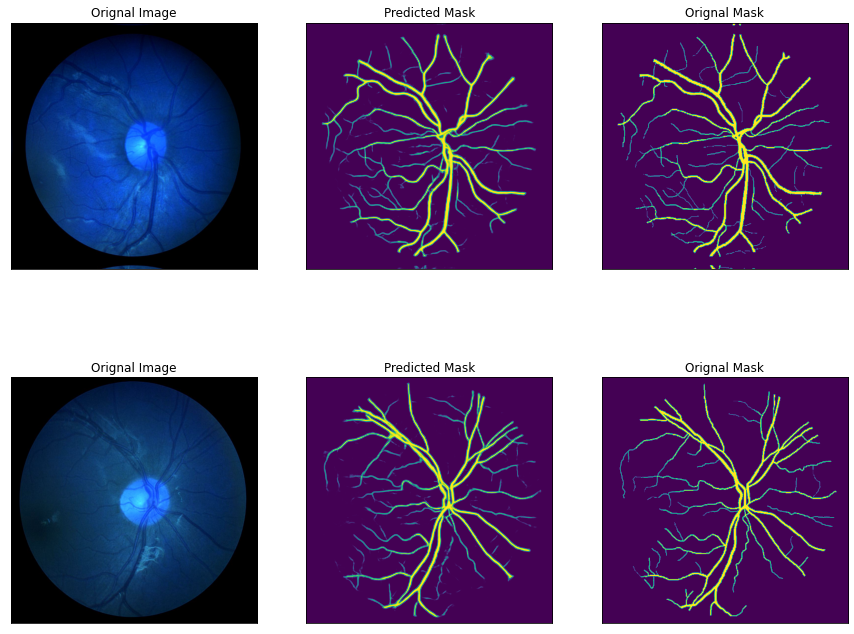

In [ ]:
plt.figure(figsize=(15,25))
for i in range(0,6,3):

    num=np.random.randint(len(y_test))

    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[num]) #[:,:,0]
    plt.title('Orignal Image')
    
    plt.subplot(4,3,i+2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Pred[num].reshape(512,512))
    plt.title('Predicted Mask')

    plt.subplot(4,3,i+3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(y_test[num])
    plt.title('Orignal Mask')
plt.show()

In [ ]:
Pred1 = model.predict(x_test, batch_size=16)
Pred1=Pred1>0.5

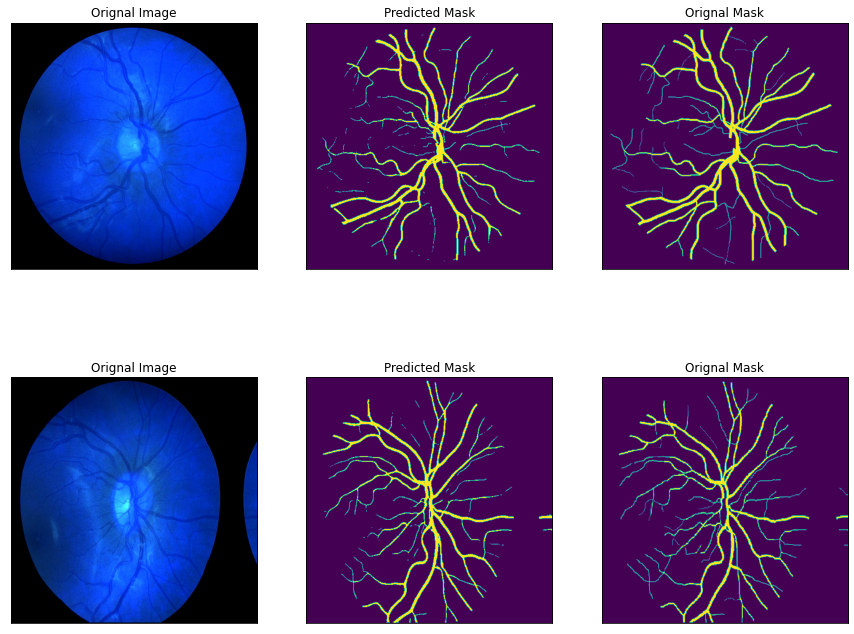

In [ ]:
plt.figure(figsize=(15,25))
for i in range(0,6,3):

    num=np.random.randint(len(y_test))

    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[num]) #[:,:,0]
    plt.title('Orignal Image')
    
    plt.subplot(4,3,i+2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Pred1[num].reshape(512,512))
    plt.title('Predicted Mask')

    plt.subplot(4,3,i+3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(y_test[num])
    plt.title('Orignal Mask')
plt.show()

### Model Evaluation

In [ ]:
m = tf.keras.metrics.MeanIoU(num_classes=2) #https://docs.w3cub.com/tensorflow~2.3/keras/metrics/precision
m.update_state(y_test, Pred1)
m.result().numpy()

0.78492796

In [ ]:
p=tf.keras.metrics.Poisson()
p.update_state(y_test, Pred1)
p.result().numpy()

0.4095921

In [ ]:
r=tf.keras.metrics.Recall()
r.update_state(y_test, Pred1)
r.result().numpy()

0.63869023

In [ ]:
b=tf.keras.metrics.BinaryAccuracy()
b.update_state(y_test, Pred1)
b.result().numpy()

0.93458855

In [ ]:
a=tf.keras.metrics.Accuracy()
a.update_state(y_test, Pred1)
a.result().numpy()

0.93458855

In [ ]:
len(Pred1)

82

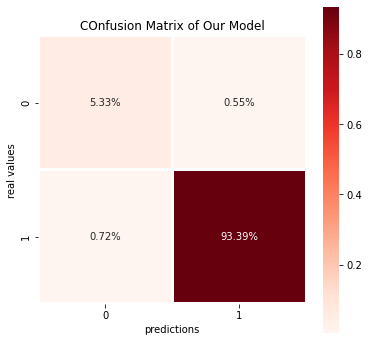

In [ ]:
#https://stackoverflow.com/questions/62755471/how-to-create-a-confusion-matrices-for-an-image-segmentation-task

FP = len(np.where(Pred1.reshape(82,512,512) - y_test  == -1)[0])
FN = len(np.where(Pred1.reshape(82,512,512) - y_test  == 1)[0])
TP = len(np.where(Pred1.reshape(82,512,512) + y_test ==2)[0])
TN = len(np.where(Pred1.reshape(82,512,512) + y_test == 0)[0])
cmat = [[TP, FN], [FP, TN]]

plt.figure(figsize = (6,6))
sns.heatmap(cmat/np.sum(cmat), cmap="Reds", annot=True, fmt = '.2%', square=1,   linewidth=2.)
plt.xlabel("predictions")
plt.ylabel("real values")
plt.title("COnfusion Matrix of Our Model")
plt.show()

# Custom Prediction

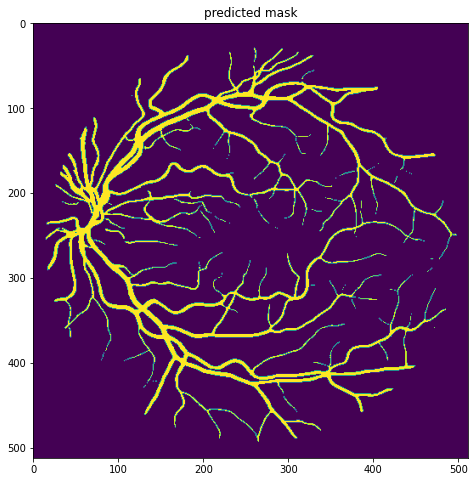

In [ ]:
img_path = '/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/test/images/01_test.tif'
  #_______Load Images_________#
img = cv2.imread(img_path,cv2.IMREAD_COLOR) 
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) 
img=img.reshape(1,IMG_SIZE,IMG_SIZE,3)
img=img/255

pred_mask=model.predict(img)
pred_mask=pred_mask>0.5

#Show predicted mask
plt.figure(figsize=(8,8))
plt.imshow(pred_mask.reshape(IMG_SIZE,IMG_SIZE))
plt.title('predicted mask')
plt.show()

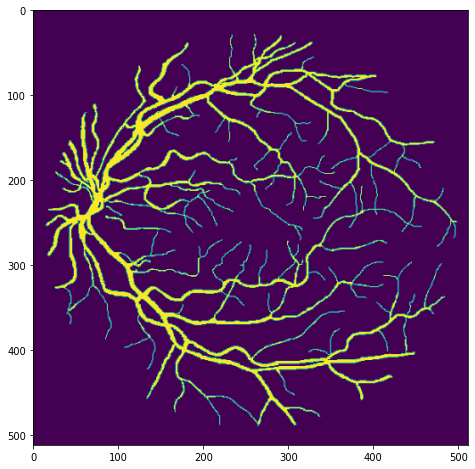

In [ ]:
msk_path = '/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/test/label/01_manual1.png'
mask = cv2.imread(msk_path,cv2.IMREAD_GRAYSCALE) 
mask = cv2.resize(mask, (IMG_SIZE,IMG_SIZE))
mask=mask/255

plt.figure(figsize=(8,8))
plt.imshow(mask)
plt.show()